# **Implementing simple Chatbot Using LangGraph**

In [ ]:
# Import TypedDict for defining structured types (dictionaries with fixed key-value types)
# This helps to define state or configuration objects with strict typing.
from typing_extensions import TypedDict

# Import the StateGraph, START, and END from LangGraph.
# - StateGraph: The main class used to create and manage graph-based workflows.
# - START and END: Special nodes representing the entry and exit points of a workflow.
from langgraph.graph import StateGraph, START, END

## Reducers
# Reducers are typically functions used in LangGraph (and similar frameworks)
# to manage state updates between nodes, combining multiple pieces of state or data.

# Importing Annotated for type hinting with metadata (like specifying constraints or descriptions)
# Annotated allows adding extra context to type hints beyond just the type itself.
from typing import Annotated

# Importing add_messages from LangGraph's message utilities.
# This helper function is used to merge or append message lists in conversational graph states.
# It helps in handling multi-turn conversations by accumulating message history.
from langgraph.graph.message import add_messages


In [ ]:
# Define a custom type 'State' using TypedDict.
# TypedDict allows you to create dictionary-like structures with type-checked keys.
# Each key in this dictionary has a defined expected type.

class State(TypedDict):
    # 'messages' key will store a list of messages (e.g., conversation history or model interactions).
    # The type hint `Annotated[list, add_messages]` means:
    #   - The base type is a list (likely containing message objects or strings).
    #   - The `add_messages` function is annotated as a reducer — it defines *how* to combine or update this list
    #     when the state is updated (for example, appending new messages rather than overwriting them).
    messages: Annotated[list, add_messages]


In [ ]:
# Import the 'os' module to interact with the operating system.
# It allows access to environment variables, file paths, and system configurations.
import os

# Import 'load_dotenv' from the 'dotenv' package.
# This function loads environment variables from a '.env' file into the system's environment.
# It's commonly used to keep API keys and sensitive credentials outside of the source code.
from dotenv import load_dotenv

# Load all environment variables defined in the '.env' file into the current runtime environment.
# After calling this, you can access variables in the file using 'os.getenv("VAR_NAME")'.
load_dotenv()

# Explicitly set the "OPENAI_API_KEY" environment variable.
# It retrieves the key from the loaded environment (via .env file) and assigns it to the OS environment.
# This ensures other libraries or frameworks can access the key globally.
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

# Similarly, set the "GROQ_API_KEY" environment variable.
# This makes sure the Groq API key is also available globally through the environment.
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [ ]:
# Import the ChatOpenAI class from the 'langchain_openai' package.
# This class provides a convenient interface to interact with OpenAI’s chat models (e.g., GPT-4, GPT-4o).
# It handles API calls, message formatting, and response parsing automatically.
from langchain_openai import ChatOpenAI

# Create an instance of the ChatOpenAI class and assign it to the variable 'llm'.
# - The 'model' parameter specifies which OpenAI model to use.
# - Here, "gpt-4o" refers to the GPT-4 Omni model, which supports both text and vision inputs.
# The 'llm' variable now represents a language model object ready to process chat-style prompts.
llm = ChatOpenAI(model="gpt-4o")

# Invoke the language model with a simple text prompt.
# The 'invoke()' method sends the input ("Hello") to the model and returns its response.
# This is equivalent to having a one-turn conversation with the LLM.
llm.invoke("Hello")


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f9f4fb6dbf', 'finish_reason': 'stop', 'logprobs': None}, id='run-902c91c5-ea3a-4466-a6c3-fea75daf2ca0-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am Krish and i like to play cricket")

AIMessage(content="Hello Krish! That's great to hear that you enjoy playing cricket. Cricket is a fantastic sport that requires skill, strategy, and teamwork. Whether you play as a batsman, bowler, or fielder, each role offers unique challenges and excitement.\n\nIf you have any questions about cricket, tips on how to improve your game, or anything else cricket-related, feel free to ask!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 39, 'total_tokens': 118, 'completion_time': 0.395, 'prompt_time': 0.004205269, 'queue_time': 0.225996294, 'total_time': 0.399205269}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-9bbe32ce-bcac-4f94-97fb-7d0c1d61690c-0', usage_metadata={'input_tokens': 39, 'output_tokens': 79, 'total_tokens': 118})

## **We Will start With Creating Nodes**

In [ ]:
# Define a function named 'superbot' that takes one argument: 'state'.
# The 'state' parameter follows the structure defined earlier by the 'State' TypedDict.
# It is expected to contain a key 'messages' that holds a list of conversation messages.
def superbot(state: State):
    # The function returns a new dictionary with a single key 'messages'.
    # Inside it, we invoke the Groq model ('llm_groq') using the current state's messages as input.
    # - 'state["messages"]' retrieves the conversation history or latest message(s).
    # - 'llm_groq.invoke(...)' sends this data to the Groq model for generating a response.
    # The response is wrapped in a list so that it matches the structure expected by LangGraph states.
    return {"messages": [llm_groq.invoke(state['messages'])]}

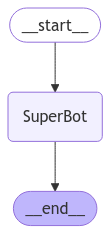

In [9]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
## Invocation
graph_builder.invoke({'messages':"Hi,My name is Krish And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='a28ca34c-eada-478e-8ed8-ef3759447093'),
  AIMessage(content="Hello Krish! Nice to meet you. Cricket is a fantastic sport, isn't it? Do you enjoy playing cricket or are you more into watching the matches? Who is your favorite cricket player? Feel free to share more about what you like about the sport!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 39, 'total_tokens': 92, 'completion_time': 0.265, 'prompt_time': 0.004223914, 'queue_time': 0.236344133, 'total_time': 0.269223914}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-a20669ad-74bd-440e-96f1-e368a5a9cdce-0', usage_metadata={'input_tokens': 39, 'output_tokens': 53, 'total_tokens': 92})]}

#### Streaming The responses

In [18]:
for event in graph_builder.stream({"messages":"Hello My name is KRish"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="Hello Krish! It's nice to meet you. How can I assist you today? Is there anything specific you would like to talk about or any questions you have?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 35, 'total_tokens': 69, 'completion_time': 0.17, 'prompt_time': 0.003981866, 'queue_time': 0.226247007, 'total_time': 0.173981866}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-cb7964d1-a9df-477e-b016-539ee446c375-0', usage_metadata={'input_tokens': 35, 'output_tokens': 34, 'total_tokens': 69})]}}


## **Notes**

**Understanding `TypedDict` in LangGraph**

In LangGraph, **`TypedDict`** is used to **define the structure of the state** — the shared memory or message context that passes between nodes.
It gives **type safety**, **clarity**, and **predictable state transitions** in complex workflows.

**Concept
**
A **LangGraph State** is like a message or memory container shared across the graph.
Every node reads from it, processes information, and updates it for downstream nodes.

```python
from typing import TypedDict, List
from langgraph.graph import StateGraph

# Define the state of the chatbot conversation
class ChatState(TypedDict):
    user_messages: List[str]
    ai_responses: List[str]
    context: str
```

This `ChatState` defines **what data the chatbot will track**:

* `user_messages`: all inputs from the user
* `ai_responses`: model-generated messages
* `context`: short-term memory or session context

This acts like a **schema** for the chatbot’s memory.

---
**How `TypedDict` Helps in Chatbots**

When building chatbots using **LangGraph**, each node can:

* **Access** parts of the state (like the last message),
* **Append** new messages,
* **Return** updated parts of the state.

Example:

```python
def user_input_node(state: ChatState):
    user_text = state["user_messages"][-1]
    return {"context": f"User asked: {user_text}"}
```

```python
def llm_response_node(state: ChatState):
    # simulate model inference
    ai_reply = f"AI response to: {state['context']}"
    return {"ai_responses": state["ai_responses"] + [ai_reply]}
```

---

**What Are Reducers in LangGraph?**

Reducers are **functions that merge or combine** outputs from multiple nodes into a **single consistent state**.

Imagine multiple nodes (LLMs, tools, retrievers, or filters) updating the same key in the state — LangGraph uses **reducers** to decide how these updates should merge.

---

**Example Scenario**

Suppose we have two nodes:

* `SentimentAnalyzer` adds emotional tone.
* `KnowledgeRetriever` adds factual context.

Both might update `context` in the chatbot state.

By default, LangGraph merges these outputs using reducers you define.

---

**Reducer Example**

```python
from langgraph.graph import StateGraph

def merge_contexts(old: str, new: str) -> str:
    """Reducer merges multiple context updates"""
    return old + " | " + new

graph = StateGraph(ChatState)
graph.add_node("Sentiment", lambda s: {"context": "Sentiment: positive"})
graph.add_node("Retriever", lambda s: {"context": "Context: AI concepts"})

graph.add_edge("Sentiment", "Retriever")
graph.set_entry_point("Sentiment")

# Register reducer for merging context fields
graph.add_reducer("context", merge_contexts)
```

Now, when both nodes update `context`, LangGraph automatically merges them using `merge_contexts()`:

```
"Sentiment: positive | Context: AI concepts"
```

Without reducers, later nodes might **overwrite** earlier ones — reducers ensure **non-destructive updates**.

---

**Reducers in Chatbot Context**

In chatbots, reducers are useful when multiple agents or reasoning nodes generate updates:

* **Multiple LLM agents** proposing responses
* **Context expansion nodes** adding retrieved info
* **Memory nodes** maintaining conversation history

Example:

```python
def merge_messages(old, new):
    return old + new  # append new messages

graph.add_reducer("ai_responses", merge_messages)
graph.add_reducer("user_messages", merge_messages)
```

Now, your chatbot can process **parallel updates** without losing earlier messages.

---

**Putting It All Together**

Here’s a small working LangGraph chatbot:

```python
from typing import TypedDict, List
from langgraph.graph import StateGraph, END

# Define chatbot state
class ChatState(TypedDict):
    user_messages: List[str]
    ai_responses: List[str]
    context: str

# Define nodes
def user_node(state: ChatState):
    user_text = state["user_messages"][-1]
    return {"context": f"User said: {user_text}"}

def llm_node(state: ChatState):
    response = f"Got it! You said '{state['context']}'."
    return {"ai_responses": state["ai_responses"] + [response]}

# Build graph
graph = StateGraph(ChatState)
graph.add_node("UserInput", user_node)
graph.add_node("AIResponse", llm_node)
graph.add_edge("UserInput", "AIResponse")
graph.add_edge("AIResponse", END)
graph.set_entry_point("UserInput")

# Add reducers
graph.add_reducer("ai_responses", lambda old, new: old + new)
graph.add_reducer("user_messages", lambda old, new: old + new)

# Compile and run
chat = graph.compile()
result = chat.invoke({"user_messages": ["Hello!"], "ai_responses": [], "context": ""})

print(result)
```

**Output:**

```python
{
  'user_messages': ['Hello!'],
  'ai_responses': ["Got it! You said 'User said: Hello!'. "],
  'context': 'User said: Hello!'
}
```

---

**Summary**

| Concept           | Purpose                             | Example Use in Chatbot                            |
| ----------------- | ----------------------------------- | ------------------------------------------------- |
| **`TypedDict`**   | Defines the schema for shared state | Tracks messages, memory, context                  |
| **Reducers**      | Merge updates from multiple nodes   | Combine multi-agent responses, memory, or context |
| **StateGraph**    | Orchestrates nodes and flows        | Controls chatbot reasoning steps                  |
| **State Passing** | Maintains continuity                | Enables memory and contextual responses           |

---

 **In essence**

* `TypedDict` gives **structure** and **type clarity** to your chatbot’s memory.
* **Reducers** enable **intelligent merging** of updates from multiple reasoning or generation nodes.
* Combined, they make **LangGraph chatbots modular, context-aware, and scalable** — perfect for complex, multi-step conversational agents.